### BOOM BIKES ASSIGNMENT

###### Importing Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

###### Importing libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 500)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

### STEP 1: Reading of data

###### Importing the data 

In [5]:
df = pd.read_csv("day.csv")

In [6]:
# Head of dataframe

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Shape of Dataframe

df.shape

(730, 16)

In [8]:
# Info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Describe the dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# Checking if there are any missing values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Renaming the columns

df.rename(columns = {"yr":"year", "mnth":"month", "hum":"humidity", "cnt":"count"}, inplace = True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Mapping the variables season, month, weathersit, weekday

df["season"] = df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter" })
df["month"] = df["month"].map({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})
df["weathersit"] = df["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"})
df["weekday"] = df["weekday"].map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Checking the data type of all the columns after dropping them

df.dtypes

instant         int64
dteday         object
season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### STEP 2: Data Visualisation

###### Dividing data into categorical and continuous

In [15]:
df.nunique()

instant       730
dteday        730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
count         695
dtype: int64

###### values <= 50: Categorical columns
###### values > 50: Continuous columns

### Analysing the Continuous Columns

### Making a pairplot of all continuous variables to check which columns are correlated to "count" variable

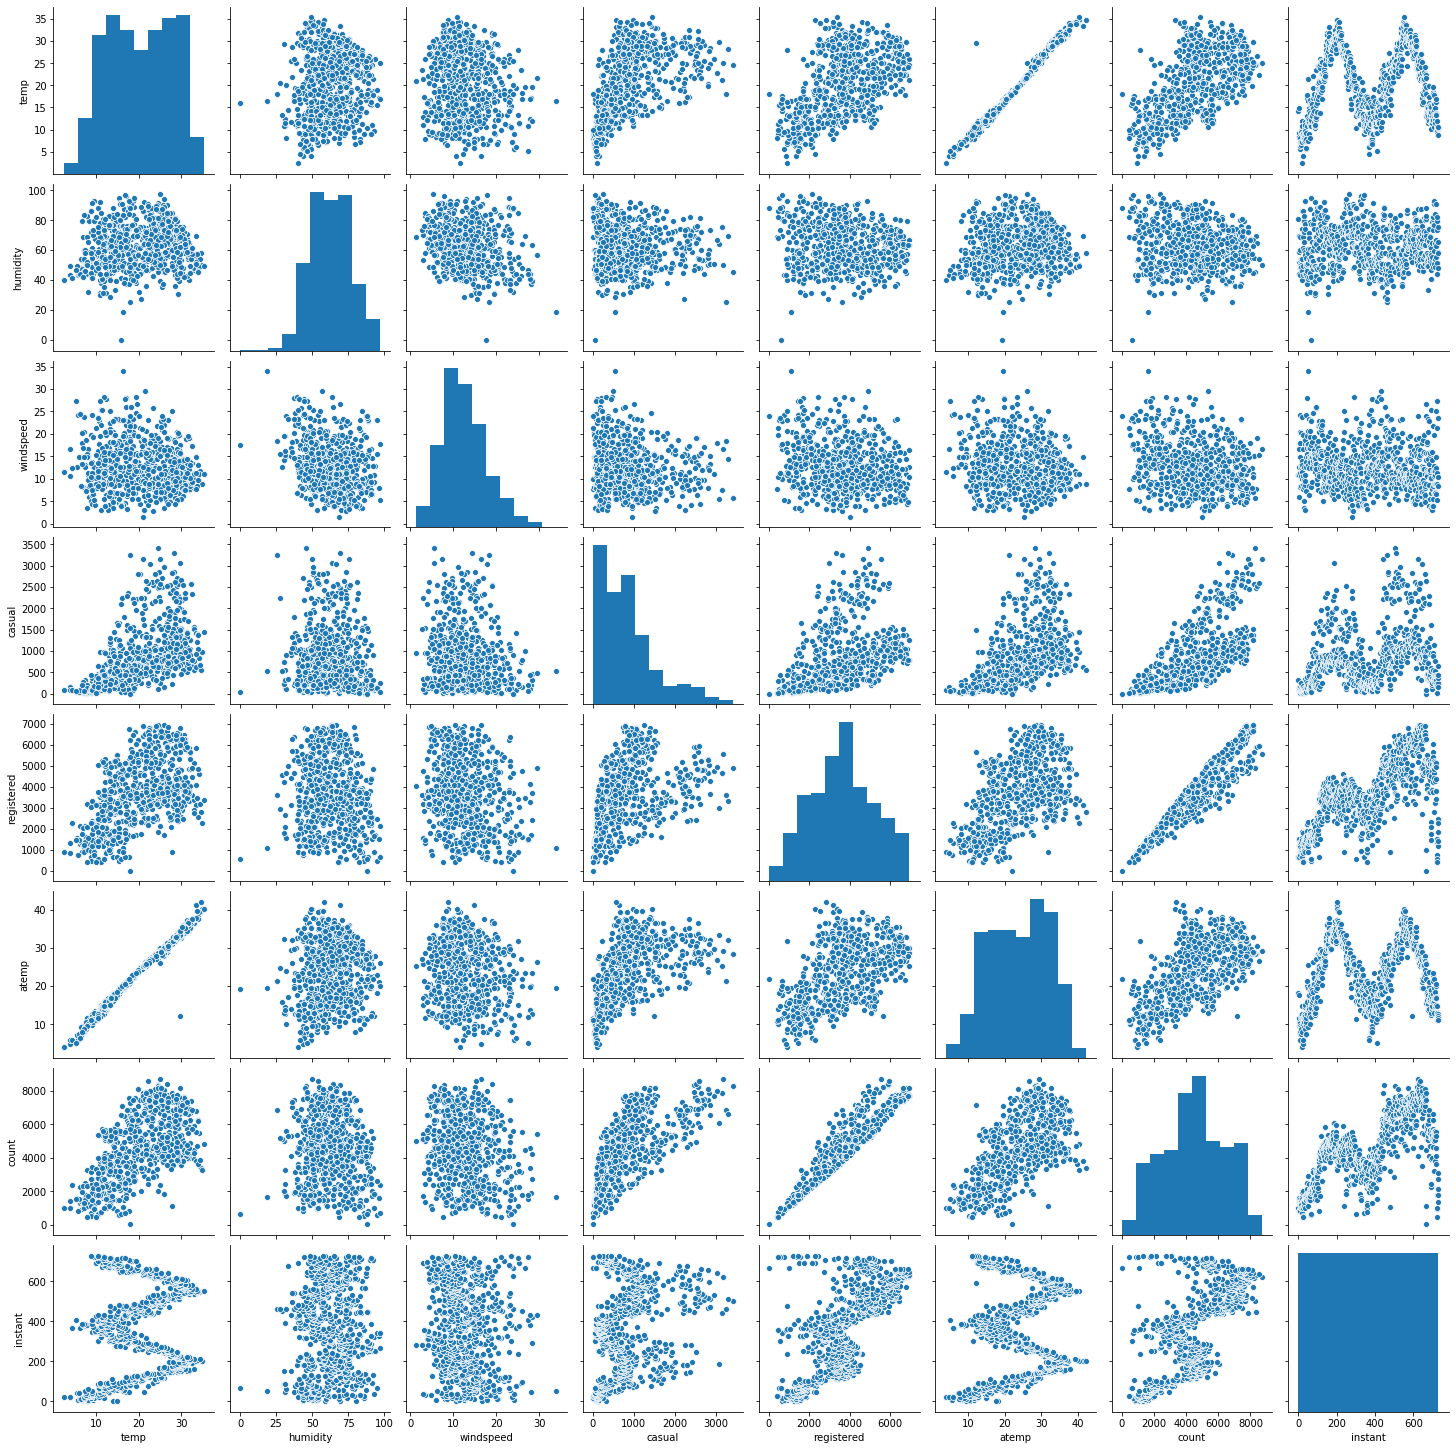

In [16]:
# Pairplot

sns.pairplot(data = df, vars = ["temp", "humidity", "windspeed", "casual", "registered", "atemp", "count", "instant"])
plt.show()

###### The most correlated column is the "temp" column

### Analysing the Categorical Columns

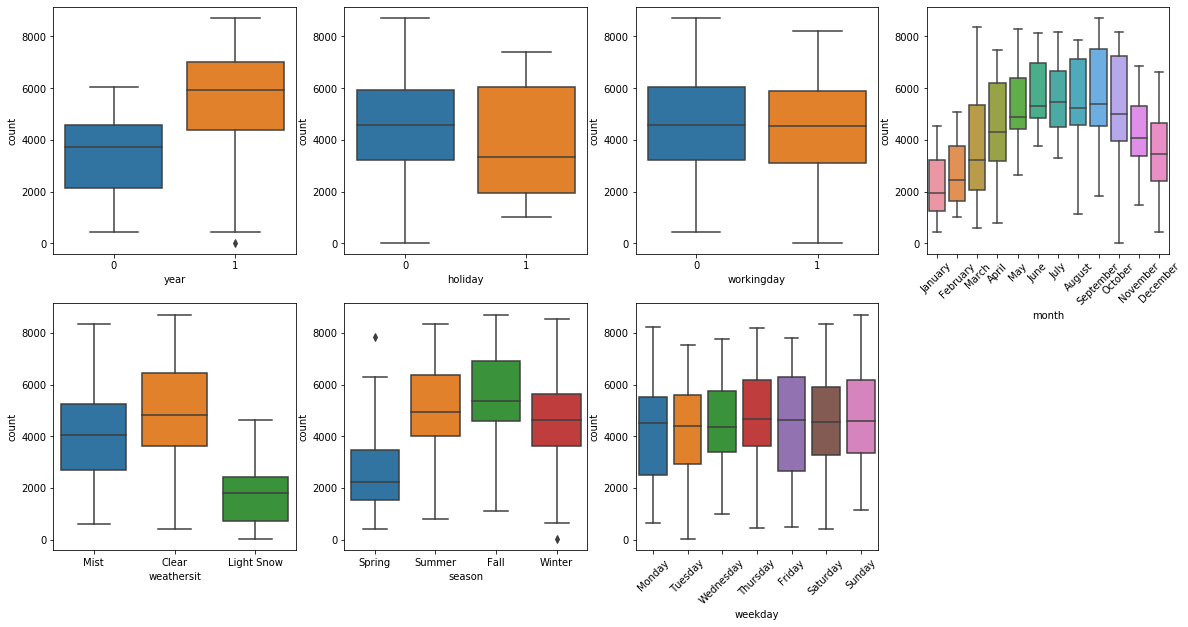

In [17]:
plt.figure(figsize=(20, 10))

plt.subplot(2,4,1)
sns.boxplot(data = df, x = "year", y = "count")

plt.subplot(2,4,2)
sns.boxplot(data = df, x = "holiday", y = "count")

plt.subplot(2,4,3)
sns.boxplot(data = df, x = "workingday", y = "count")

plt.subplot(2,4,4)
plt.xticks(rotation = 45)
sns.boxplot(data = df, x = "month", y = "count")

plt.subplot(2,4,5)
sns.boxplot(data = df, x = "weathersit", y = "count")

plt.subplot(2,4,6)
sns.boxplot(data = df, x = "season", y = "count")

plt.subplot(2,4,7)
plt.xticks(rotation = 45)
sns.boxplot(data = df, x = "weekday", y = "count")

plt.show()

###### The plots above shows the relationship between categorical variables and the count variable.  
- Bike Rentals are more during the Fall season and then in summer
- Bike Rentals are more in the year 2019 compared to 2018
- Bike Rentals are more in partly cloudy weather
- Bike Rentals are more on Saturday,wednesday and thursday

### Now, plotting a heatmap of checking the correlation between the variables

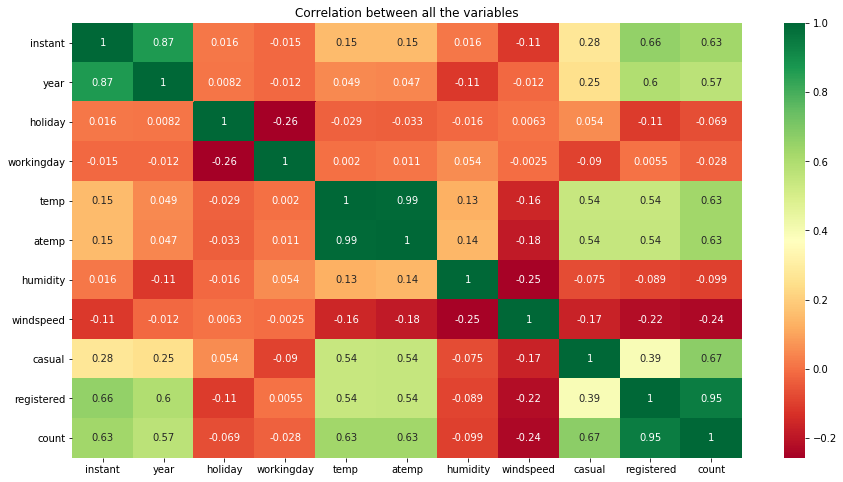

In [18]:
plt.figure(figsize = (15,8))
plt.title("Correlation between all the variables")
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)
plt.show()

Now, from the heatmap, we can see that temp, year,humidity variables are correlated to 'count' variable

So, we can consider this in building a Linear Regression Model

In [19]:
# Dropping the columns that are not necessary

df.drop(columns = ["instant", "dteday", "casual", "registered", "atemp"], inplace = True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### STEP 3: Data Preparation

In [20]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [21]:
# Making dummy variables for month, season, weathersit, weekday and then drop the first column

months = pd.get_dummies(df.month, drop_first = True)
week_day = pd.get_dummies(df.weekday, drop_first = True)
weather_sit = pd.get_dummies(df.weathersit, drop_first = True)
seasons = pd.get_dummies(df.season, drop_first = True)

In [22]:
# Merging the dummy variables with the dataframe

df = pd.concat([months, week_day, weather_sit, seasons, df], axis = 1)
df.head()

,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,Spring,Summer,Winter,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
df.shape

(730, 33)

In [24]:
# Dropping 'season','month','weekday','weathersit' columns as we have created their dummy variables

df.drop(["season","month","weekday","weathersit"], axis = 1, inplace = True)
df.head()

,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [25]:
df.shape

(730, 29)

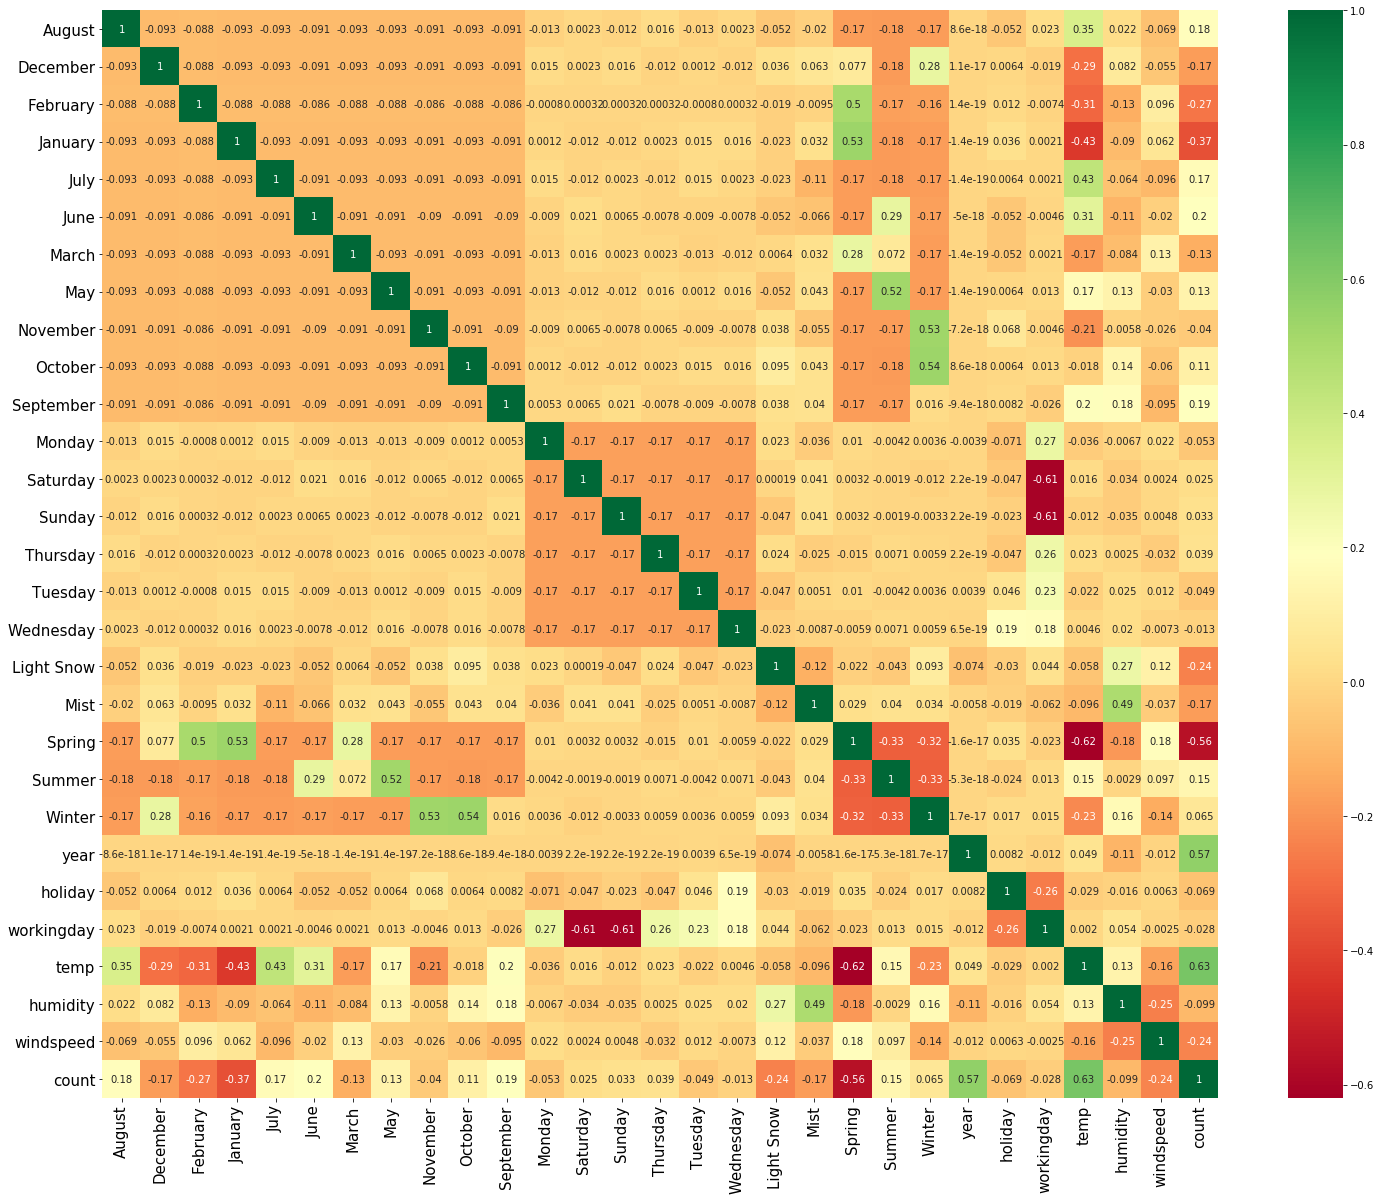

In [26]:
# Now, checking the correlation between variables again and plottimg a heatmap between them

plt.figure(figsize=(25, 20))
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.show()

- In this, we can say that temperature, summer season, june to october months are correlated with the "count" variable

### Step 4: Splitting the Data into Training and Test Sets

In [27]:
# Creating the train and test set

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [28]:
# Checking the shape of the train set

df_train.shape

(510, 29)

In [29]:
# Checking the shape of the test set

df_test.shape

(220, 29)

###### Rescaling the variables

We will be using MinMax Scaling method

In [30]:
# Instantiating an object

scaler = MinMaxScaler()

In [31]:
# Creating a list that require re-scaling

num_vars = ["temp", "humidity", "windspeed", "count"]

In [32]:
# Fit the data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [33]:
# describe the train set 

df_train.describe()

,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


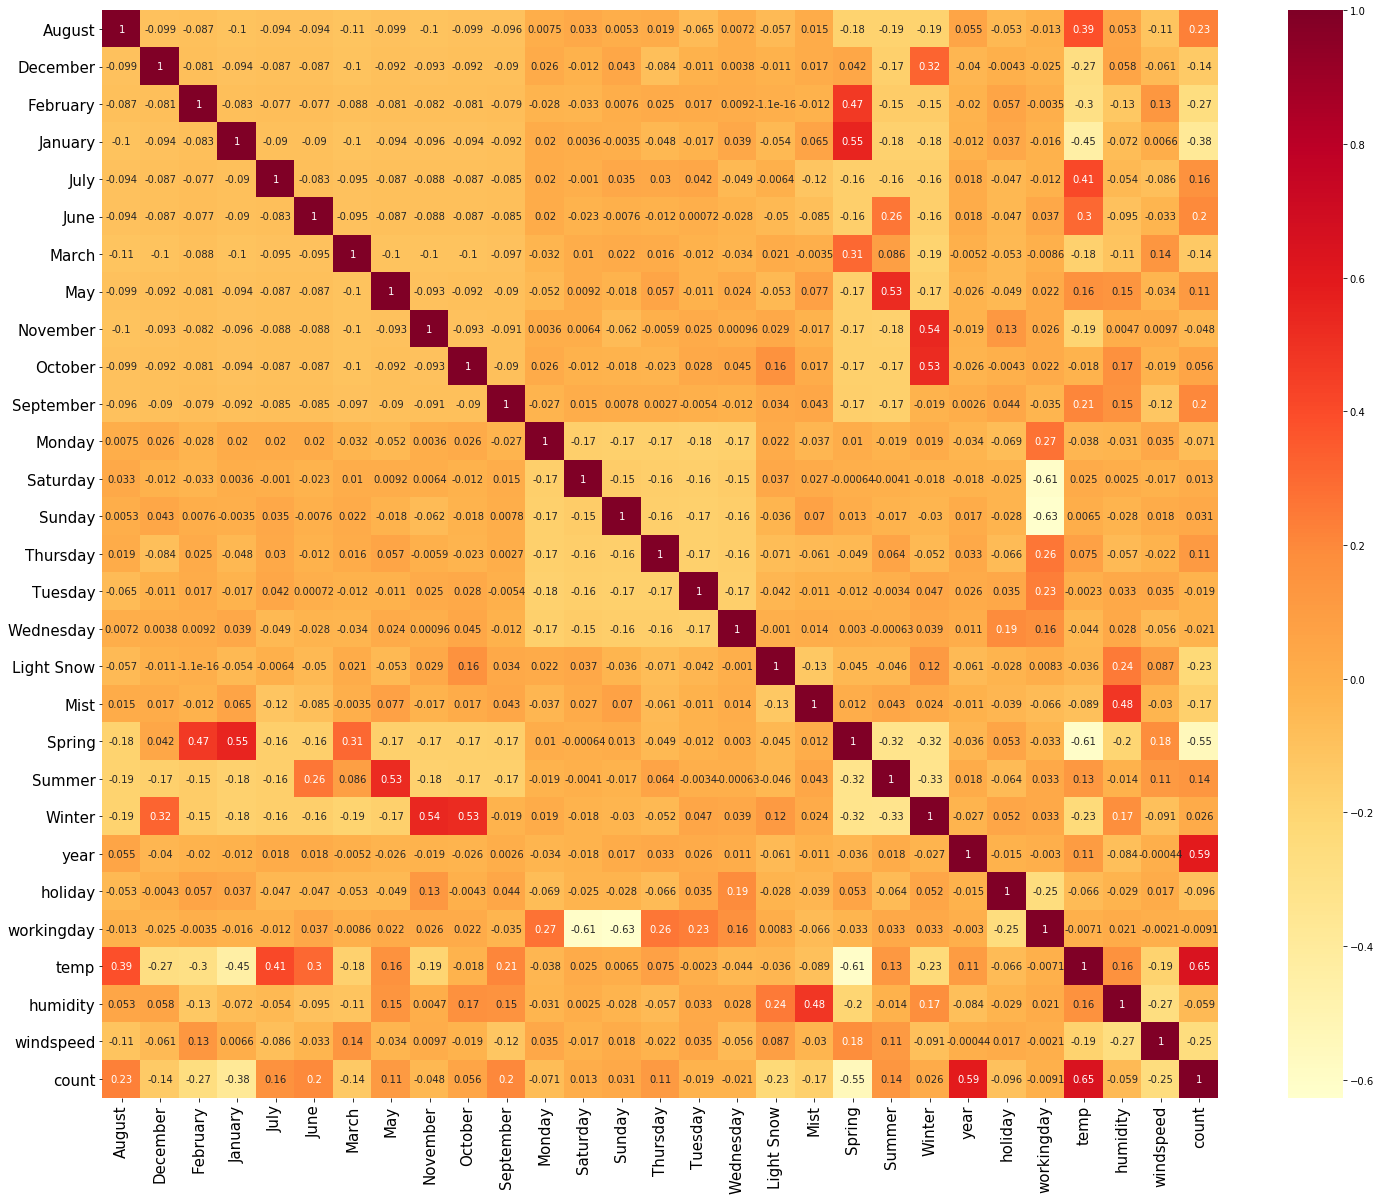

In [34]:
# Plotting a heatmap of the correlation of the train set

plt.figure(figsize = (25,20))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.heatmap(df_train.corr(), annot = True, cmap = "YlOrRd")
plt.show()

- From the heatmap, we can see temp and year are correlated with the "count" variable
- Even in August and September months we can see the counts are little high

###### Creating the X and Y train set for building the model

In [35]:
y_train = df_train.pop("count")
x_train = df_train

### STEP 5: Building the Model

In [36]:
# Running RFE with output number of variables = 15

lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [37]:
# Listing the variables accoring to their ranking or priority

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('August', False, 9),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [38]:
# Segregating all the RFE = True variables into onevariable and the False ones to another

col = x_train.columns[rfe.support_]
col

Index(['December', 'January', 'July', 'November', 'September', 'Light Snow',
       'Mist', 'Spring', 'Summer', 'Winter', 'year', 'holiday', 'temp',
       'humidity', 'windspeed'],
      dtype='object')

In [39]:
col1 = x_train.columns[~rfe.support_]
col1

Index(['August', 'February', 'June', 'March', 'May', 'October', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'workingday'],
      dtype='object')

In [40]:
# Creating a dataframe with all the RFE variable = True

x_train_rfe = x_train[col]
x_train_rfe

,December,January,July,November,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp,humidity,windspeed
576,0,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,0,0,0,0,0,0,0,1,0,0,0,0,0.202618,0.435939,0.111379
350,1,0,0,0,0,0,1,0,0,1,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,0,1,0,1,0,0,0,0.462664,0.759870,0.529881


In [41]:
# Adding a constant

x_train_rfe = sm.add_constant(x_train_rfe)

# Creating 1st model

lr = sm.OLS(y_train, x_train_rfe)

# Fit the model

lr_model = lr.fit()

# Summary of the model

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          8.15e-189
Time:                        14:02:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

### Checking VIF

In [42]:
# Dropping the constant variable

x_train_rfe = x_train_rfe.drop(["const"], axis = 1)
x_train_rfe

,December,January,July,November,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp,humidity,windspeed
576,0,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,0,0,0,0,0,0,0,1,0,0,0,0,0.202618,0.435939,0.111379
350,1,0,0,0,0,0,1,0,0,1,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,0,1,0,1,0,0,0,0.462664,0.759870,0.529881


In [43]:
# Calculating the VIF values for the model

vif = pd.DataFrame()
x = x_train_rfe
vif["Features"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,Spring,4.37
9,Winter,4.06
8,Summer,2.82
6,Mist,2.32
10,year,2.09
3,November,1.85
1,January,1.75


###### December is insignificant as compared to other variables due to high p-value and low VIF, so it can be dropped

In [44]:
# Dropping December Column

x_train_rfe1 = x_train_rfe.drop(["December"], axis = 1)

###### Rebuilding a new model without the December column

In [45]:
# Building the model

# Adding a constant

x_train_new1 = sm.add_constant(x_train_rfe1)

# Creating 1st model

lr1 = sm.OLS(y_train, x_train_new1)

# Fit the model

lr1_model = lr1.fit()

# Summary of the model

print(lr1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          4.41e-189
Time:                        14:02:10   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3032      0.035      8.598      0.0

In [46]:
# Dropping the constant variable

x_train_new1 = x_train_new1.drop(["const"], axis = 1)
x_train_new1

,January,July,November,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp,humidity,windspeed
576,0,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,0,0,0,0,0,0,1,0,0,0,0,0.202618,0.435939,0.111379
350,0,0,0,0,0,1,0,0,1,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,0,1,0,1,0,0,0,0.462664,0.759870,0.529881


In [47]:
# Calculating the VIF values

vif = pd.DataFrame()
x1 = x_train_new1
vif['Features'] = x1.columns
vif['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.09
11,temp,16.80
13,windspeed,4.72
6,Spring,4.37
8,Winter,3.78
7,Summer,2.80
5,Mist,2.29
9,year,2.09
0,January,1.67
2,November,1.60


###### January is insignificant as compared to other variables due to high p-value and low VIF, so it can be dropped

In [48]:
# Dropping January Column

x_train_rfe2 = x_train_rfe1.drop(["January"], axis = 1)

###### Rebuilding a new model without the January column

In [49]:
# Building the model

# Adding a constant

x_train_new2 = sm.add_constant(x_train_rfe2)

# Creating 1st model

lr2 = sm.OLS(y_train, x_train_new2)

# Fit the model

lr2_model = lr2.fit()

# Summary of the model

print(lr2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          1.94e-189
Time:                        14:02:11   Log-Likelihood:                 510.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2910      0.035      8.364      0.0

In [50]:
# Dropping the constant variable

x_train_new2 = x_train_new2.drop(["const"], axis = 1)
x_train_new2

,July,November,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp,humidity,windspeed
576,1,0,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,0,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,0,0,0,0,0,1,0,0,0,0,0.202618,0.435939,0.111379
350,0,0,0,0,1,0,0,1,0,0,0.248216,0.577930,0.431816
79,0,0,0,0,1,0,1,0,0,0,0.462664,0.759870,0.529881


In [51]:
# Calculating the VIF values

vif = pd.DataFrame()
x2 = x_train_new2
vif['Features'] = x2.columns
vif['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,28.10
10,temp,16.12
12,windspeed,4.71
5,Spring,4.04
7,Winter,3.75
6,Summer,2.80
4,Mist,2.29
8,year,2.08
1,November,1.60
0,July,1.58


###### November is insignificant as compared to other variables due to high VIF, so it can be dropped

In [52]:
# Dropping November Column

x_train_rfe3 = x_train_rfe2.drop(["November"], axis = 1)

###### Rebuilding a new model without the November column

In [53]:
# Building the model

# Adding a constant

x_train_new3 = sm.add_constant(x_train_rfe3)

# Creating 1st model

lr3 = sm.OLS(y_train, x_train_new3)

# Fit the model

lr3_model = lr3.fit()

# Summary of the model

print(lr3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          2.95e-190
Time:                        14:02:12   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.034      8.258      0.0

In [54]:
# Dropping the constant variable

x_train_new3 = x_train_new3.drop(["const"], axis = 1)
x_train_new3

,July,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp,humidity,windspeed
576,1,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,0,0,0,1,1,0,0,1,0,0.442393,0.640189,0.255342
728,0,0,0,0,1,0,0,1,0,0.245101,0.498067,0.663106
482,0,0,0,1,0,1,0,1,0,0.395666,0.504508,0.188475
111,0,0,0,1,0,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,0,0,0,0,1,0,0,0,0,0.202618,0.435939,0.111379
350,0,0,0,1,0,0,1,0,0,0.248216,0.577930,0.431816
79,0,0,0,1,0,1,0,0,0,0.462664,0.759870,0.529881


In [55]:
# Calculating the VIF values

vif = pd.DataFrame()
x3 = x_train_new3
vif['Features'] = x3.columns
vif['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,28.03
9,temp,16.03
11,windspeed,4.65
4,Spring,4.01
6,Winter,3.33
5,Summer,2.79
3,Mist,2.28
7,year,2.08
0,July,1.58
1,September,1.38


###### Humidity is insignificant as compared to other variables due to high VIF, so it can be dropped

In [56]:
# Dropping Humidity Column

x_train_rfe4 = x_train_rfe3.drop(["humidity"], axis = 1)

###### Rebuilding a new model without the Humidity column

In [57]:
# Building the model

# Adding a constant

x_train_new4 = sm.add_constant(x_train_rfe4)

# Creating 1st model

lr4 = sm.OLS(y_train, x_train_new4)

# Fit the model

lr4_model = lr4.fit()

# Summary of the model

print(lr4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          5.06e-187
Time:                        14:02:13   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [58]:
# Dropping the constant variable

x_train_new4 = x_train_new4.drop(["const"], axis = 1)
x_train_new4

,July,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp,windspeed
576,1,0,0,0,0,0,0,1,0,0.815169,0.264686
426,0,0,0,1,1,0,0,1,0,0.442393,0.255342
728,0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,0,0,0,1,0,1,0,1,0,0.395666,0.188475
111,0,0,0,1,0,1,0,0,0,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,0,0.863973,0.187140
53,0,0,0,0,1,0,0,0,0,0.202618,0.111379
350,0,0,0,1,0,0,1,0,0,0.248216,0.431816
79,0,0,0,1,0,1,0,0,0,0.462664,0.529881


In [59]:
# Calculating the VIF values

vif = pd.DataFrame()
x4 = x_train_new4
vif['Features'] = x4.columns
vif['VIF'] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,Summer,2.23
4,Spring,2.08
7,year,2.07
6,Winter,1.78
0,July,1.58
3,Mist,1.55
1,September,1.34
2,Light Snow,1.08


###### Windspeed is insignificant as compared to other variables due to high VIF and has negative correlation with "count", so it can be dropped

In [60]:
# Dropping Windspeed Column

x_train_rfe5 = x_train_rfe4.drop(["windspeed"], axis = 1)

###### Rebuilding a new model without the Windspeed column

In [61]:
# Building the model

# Adding a constant

x_train_new5 = sm.add_constant(x_train_rfe5)

# Creating 1st model

lr5 = sm.OLS(y_train, x_train_new5)

# Fit the model

lr5_model = lr5.fit()

# Summary of the model

print(lr5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          5.71e-181
Time:                        14:02:14   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.029      5.124      0.0

In [62]:
# Dropping the constant variable

x_train_new5 = x_train_new5.drop(["const"], axis = 1)
x_train_new5

,July,September,Light Snow,Mist,Spring,Summer,Winter,year,holiday,temp
576,1,0,0,0,0,0,0,1,0,0.815169
426,0,0,0,1,1,0,0,1,0,0.442393
728,0,0,0,0,1,0,0,1,0,0.245101
482,0,0,0,1,0,1,0,1,0,0.395666
111,0,0,0,1,0,1,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,1,0,0.863973
53,0,0,0,0,1,0,0,0,0,0.202618
350,0,0,0,1,0,0,1,0,0,0.248216
79,0,0,0,1,0,1,0,0,0,0.462664


In [63]:
# Calculating the VIF values

vif = pd.DataFrame()
x5 = x_train_new5
vif['Features'] = x5.columns
vif['VIF'] = [variance_inflation_factor(x5.values, i) for i in range(x5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,year,2.06
5,Summer,1.94
0,July,1.58
6,Winter,1.57
3,Mist,1.55
4,Spring,1.40
1,September,1.34
2,Light Snow,1.07
8,holiday,1.04


###### Summer is insignificant as compared to other variables due to high p-values and low VIF, so it can be dropped

In [64]:
# Dropping Summer Column

x_train_rfe6 = x_train_rfe5.drop(["Summer"], axis = 1)

###### Rebuilding a new model without the Summer column

In [65]:
# Building the model

# Adding a constant

x_train_new6 = sm.add_constant(x_train_rfe6)

# Creating 1st model

lr6 = sm.OLS(y_train, x_train_new6)

# Fit the model

lr6_model = lr6.fit()

# Summary of the model

print(lr6_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          5.25e-181
Time:                        14:02:15   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1952      0.022      8.802      0.0

In [66]:
# Dropping the constant variable

x_train_new7 = x_train_new6.drop(["const"], axis = 1)
x_train_new7

,July,September,Light Snow,Mist,Spring,Winter,year,holiday,temp
576,1,0,0,0,0,0,1,0,0.815169
426,0,0,0,1,1,0,1,0,0.442393
728,0,0,0,0,1,0,1,0,0.245101
482,0,0,0,1,0,0,1,0,0.395666
111,0,0,0,1,0,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,1,0,0.863973
53,0,0,0,0,1,0,0,0,0.202618
350,0,0,0,1,0,1,0,0,0.248216
79,0,0,0,1,0,0,0,0,0.462664


In [67]:
# Calculating the VIF values

vif = pd.DataFrame()
x6 = x_train_new7
vif['Features'] = x6.columns
vif['VIF'] = [variance_inflation_factor(x6.values, i) for i in range(x6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,2.99
6,year,2.05
3,Mist,1.51
0,July,1.33
5,Winter,1.33
4,Spring,1.25
1,September,1.19
2,Light Snow,1.06
7,holiday,1.04


###### Yes, now we can see that we have our model
###### The R-Squared value for the model is 0.822 or 82.2%
###### The VIF values and P-values both are within the acceptable range

### Step 6: Residual Analysis 

In [68]:
# Let's, plot the histogram of the error terms

x_train_new6

,const,July,September,Light Snow,Mist,Spring,Winter,year,holiday,temp
576,1.0,1,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,0,1,1,0,1,0,0.442393
728,1.0,0,0,0,0,1,0,1,0,0.245101
482,1.0,0,0,0,1,0,0,1,0,0.395666
111,1.0,0,0,0,1,0,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.863973
53,1.0,0,0,0,0,1,0,0,0,0.202618
350,1.0,0,0,0,1,0,1,0,0,0.248216
79,1.0,0,0,0,1,0,0,0,0,0.462664


In [69]:
# predicted y_train 

y_train_pred = lr6_model.predict(x_train_new6)

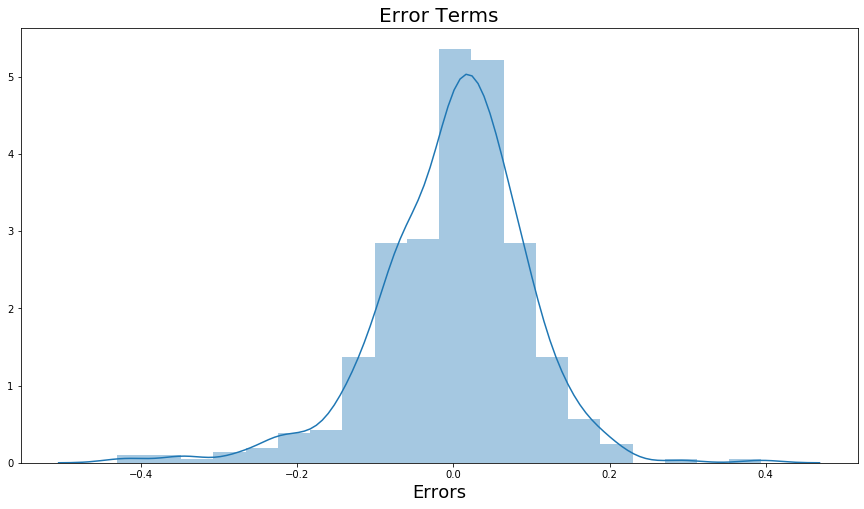

In [70]:
# Plotting a histogram of error terms

plt.figure(figsize = (15,8))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Error Terms", fontsize = 20)                  
plt.xlabel("Errors", fontsize = 18)  
plt.show()

###### We can see that the error terms are distributed normally

### STEP 7: Making Predictions

###### Rescaling the test sets

In [71]:
# Creating a list of numerical variables

num_vars = ["temp", "humidity", "windspeed", "count"]

In [72]:
# Fit the data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [73]:
# Dividing the data into x_test and y_test

y_test = df_test.pop("count")
x_test = df_test

In [74]:
# Describe the x_test 

x_test.describe()

,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist,Spring,Summer,Winter,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [77]:
# Column names in the train test

x_train_new7.columns

Index(['July', 'September', 'Light Snow', 'Mist', 'Spring', 'Winter', 'year',
       'holiday', 'temp'],
      dtype='object')

In [78]:
# Using the training model to make predictions.

# Creating x_test_new dataframe by dropping variables from x_test

x_test_new = x_test[x_train_new7.columns]

In [79]:
# Adding a constant variable 

x_test_new1 = sm.add_constant(x_test_new)
x_test_new1.head()

,const,July,September,Light Snow,Mist,Spring,Winter,year,holiday,temp
184,1.0,1,0,0,1,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,0,1,0,0.901354
299,1.0,0,0,0,1,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,0,0,0.817246


In [80]:
# Making predictions

y_pred = lr6_model.predict(x_test_new1)

###### Finding R-squared and Adjusted R-Squared values for test set

In [83]:
# Evaluating the R-squared test value

r2_score(y_test,y_pred)

0.8096078487662726

In [114]:
# Adjusted R^2
# adj r2=1-(1-R2)*(n-1)/(n-p-1)

Adj_r2 = 1-(1-0.8096078487662726)*(10-1)/(10-1-1)
print(Adj_r2)

0.7858088298620567


### STEP 8: Model Evaluation

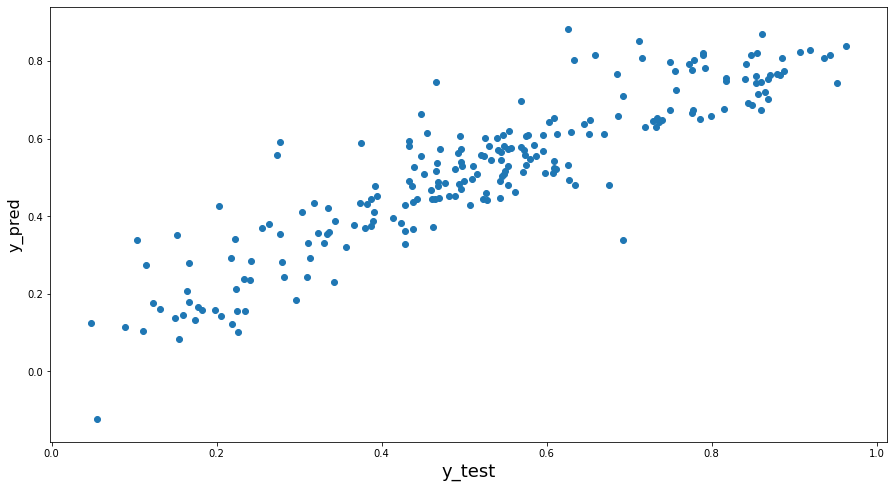

In [104]:
# Plotting y_test and y_pred

plt.figure(figsize = (15,8))
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred", fontsize = 20)             
plt.xlabel("y_test", fontsize = 18)                          
plt.ylabel("y_pred", fontsize = 16)                          
plt.show()

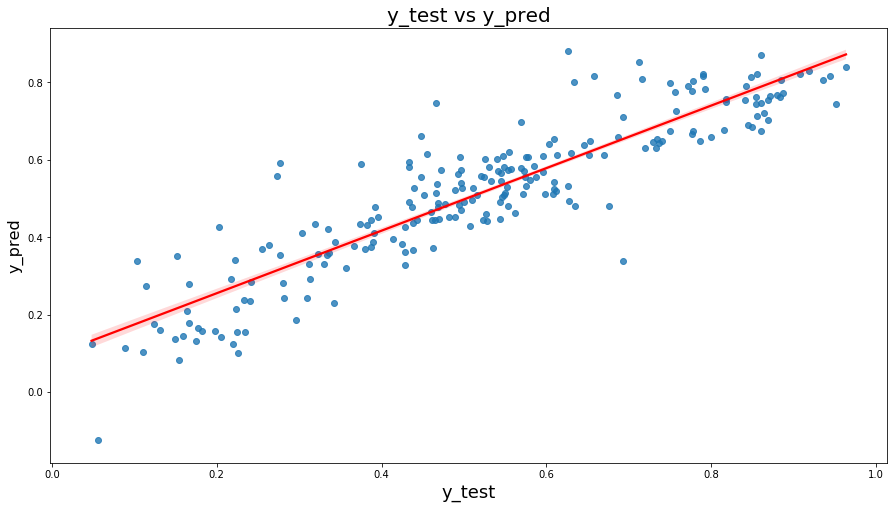

In [105]:
# Plotting the regression line on the scatter plot

plt.figure(figsize = (15,8))
sns.regplot(x = y_test, y = y_pred, ci = 68, fit_reg = True, line_kws = {"color": "red"})
plt.title("y_test vs y_pred", fontsize = 20)             
plt.xlabel("y_test", fontsize = 18)                      
plt.ylabel("y_pred", fontsize = 16)                          
plt.show()

###### The equation for the best fit line is as follows
###### count = 0.1952 + 0.0654 X September - 0.0690 X July - 0.2993 X Light Snow - 0.0781 X Mist - 0.1122 X Spring + 0.0534 X Winter + 0.2332 X year - 0.1006 X holiday + 0.4695 X temp

### Final Result Comparison between Train model and Test:

### - Train R^2 :  0.822

### - Train Adjusted R^2 : 0.819

### - Test R^2: 0.8096

### - Test Adjusted R^2: 0.7858

### - Difference in R^2 between train and test: 1.24%

### - Difference in adjusted R^2 between Train and test: 3.32% which is less than 5%

# Interpretation:

### -  We can see that the temperature variable is having the highest coefficient value of 0.4695, which means if the temperature increases by one unit the number of bike rentals increases by 0.4695 units.

### - Similary, we can see that the coefficients of other variables in the equation are best for the line.

### - We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have July, Spring, Mist , Light Snow, Holiday variables with negative coefficient.  The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

# Business Goals:

### -  A US bike-sharing provider BoomBikes can focus more on Temperature

### -  We can see that the demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better

### - Can focus more  on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.

### - We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand

### -  Now seeing to weathersit variable, we have got negative coefficients for Mist and Lightsnow weather and we can give offers to them too